In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import statsmodels.api as sm

In [7]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
train_identity = pd.read_csv('/Users/arcarter/Git_Repos/project_03/data/ieee-fraud-detection/train_identity.csv')

In [9]:
train_transaction = pd.read_csv('/Users/arcarter/Git_Repos/project_03/data/ieee-fraud-detection/train_transaction.csv')

In [10]:
train_transaction_identity = train_transaction.merge(train_identity, on='TransactionID',how='left')

In [11]:
target_counts = train_transaction_identity['isFraud'].value_counts()

In [12]:
target_counts

0    569877
1     20663
Name: isFraud, dtype: int64

In [14]:
plt.bar(color=['blue', 'orange'])

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

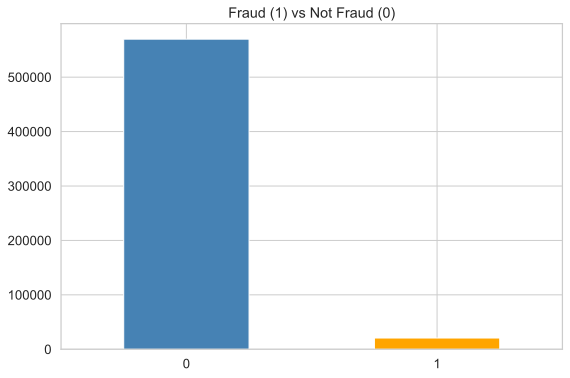

In [21]:
#plt.bar(labels, values, color=['blue', 'orange'])
target_counts.plot(kind='bar', title='Fraud (1) vs Not Fraud (0)', rot=0,color=['steelblue', 'orange']);

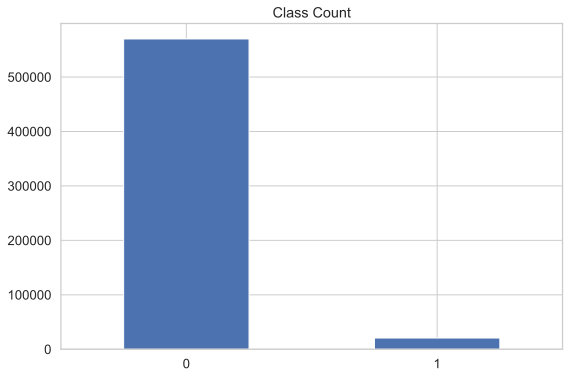

In [22]:
target_counts.plot(kind='bar', title='Class Count', rot=0);

In [16]:
def df_column_unique_values(df, top_n = 5):
    for col_name, values in df.iteritems():
        col_value_counts = values.value_counts()
        print(f"{col_name} : {len(col_value_counts)}")
        col_value_count_list = [
            "'" + str(c) + "'" + ":" + str(n) for c, n in sorted(
                col_value_counts.items(),
                key=lambda kv: kv[1],
                reverse=True
            )
        ]
        print(", ".join(col_value_count_list[:min(len(col_value_count_list), top_n)]))
        # print ('\\n')

In [17]:
df_column_unique_values(train_transaction_identity)

TransactionID : 590540
'3147775':1, '3089230':1, '3189951':1, '3187902':1, '3194045':1
isFraud : 2
'0':569877, '1':20663
TransactionDT : 573349
'9474817':8, '11576951':5, '7236588':5, '4397066':5, '8468062':4
TransactionAmt : 20902
'59.0':30582, '117.0':28933, '107.95':23954, '57.95':23600, '100.0':20362
ProductCD : 5
'W':439670, 'C':68519, 'R':37699, 'H':33024, 'S':11628
card1 : 13553
'7919':14932, '9500':14162, '15885':10361, '17188':10344, '15066':7945
card2 : 500
'321.0':48935, '111.0':45191, '555.0':41995, '490.0':38145, '583.0':21803
card3 : 114
'150.0':521287, '185.0':56346, '106.0':1571, '146.0':1252, '144.0':1252
card4 : 4
'visa':384767, 'mastercard':189217, 'american express':8328, 'discover':6651
card5 : 119
'226.0':296546, '224.0':81513, '166.0':57140, '102.0':29105, '117.0':25941
card6 : 4
'debit':439938, 'credit':148986, 'debit or credit':30, 'charge card':15
addr1 : 332
'299.0':46335, '325.0':42751, '204.0':42020, '264.0':39870, '330.0':26287
addr2 : 74
'87.0':520481, '6

V77 : 31
'1.0':474434, '2.0':18955, '3.0':3695, '4.0':1623, '5.0':742
V78 : 32
'1.0':457915, '2.0':31364, '3.0':6135, '4.0':2261, '5.0':1125
V79 : 8
'0.0':436802, '1.0':61751, '2.0':2179, '3.0':435, '7.0':109
V80 : 20
'0.0':434732, '1.0':63368, '2.0':2283, '3.0':475, '4.0':245
V81 : 20
'0.0':434653, '1.0':60829, '2.0':4033, '3.0':902, '4.0':509
V82 : 8
'1.0':402612, '0.0':88757, '2.0':9288, '3.0':626, '4.0':76
V83 : 8
'1.0':396619, '0.0':83605, '2.0':18834, '3.0':1816, '4.0':292
V84 : 8
'0.0':435246, '1.0':63848, '2.0':2035, '3.0':191, '4.0':35
V85 : 8
'0.0':435103, '1.0':59565, '2.0':5322, '3.0':987, '4.0':216
V86 : 31
'1.0':476911, '2.0':19527, '3.0':2428, '4.0':743, '0.0':727
V87 : 31
'1.0':463708, '2.0':30832, '3.0':3761, '4.0':1033, '0.0':694
V88 : 2
'1.0':500998, '0.0':378
V89 : 3
'0.0':500954, '1.0':392, '2.0':30
V90 : 6
'0.0':305817, '1.0':190162, '2.0':4941, '3.0':388, '4.0':64
V91 : 7
'0.0':305135, '1.0':184121, '2.0':10470, '3.0':1086, '4.0':336
V92 : 8
'0.0':428699, '1.0':7

V196 : 39
'1.0':136911, '2.0':1415, '3.0':335, '4.0':212, '5.0':118
V197 : 15
'1.0':128419, '0.0':9693, '2.0':1256, '3.0':235, '4.0':102
V198 : 22
'1.0':128276, '0.0':9579, '2.0':1318, '3.0':297, '4.0':121
V199 : 46
'1.0':125279, '2.0':9231, '3.0':2119, '4.0':871, '5.0':462
V200 : 46
'1.0':117750, '0.0':9693, '2.0':8523, '3.0':1723, '4.0':728
V201 : 56
'1.0':116412, '0.0':9579, '2.0':9285, '3.0':1922, '4.0':860
V202 : 10970
'0.0':106161, '100.0':2186, '200.0':1500, '50.0':1391, '150.0':1256
V203 : 14951
'0.0':98207, '100.0':2372, '200.0':1580, '50.0':1553, '150.0':1341
V204 : 12858
'0.0':101660, '100.0':2289, '200.0':1541, '50.0':1507, '150.0':1306
V205 : 2240
'0.0':128800, '100.0':598, '50.0':370, '150.0':218, '25.0':205
V206 : 1780
'0.0':132868, '100.0':288, '50.0':253, '150.0':171, '25.0':120
V207 : 3246
'0.0':123086, '877.0':914, '50.0':552, '100.0':483, '619.0':342
V208 : 2552
'0.0':123863, '75.0':1461, '50.0':716, '100.0':553, '25.0':360
V209 : 3451
'0.0':122714, '1961.0':921, '5

V310 : 19136
'0.0':354815, '107.9499969482422':6520, '59.0':6245, '117.0':5804, '57.95000076293945':5757
V311 : 3098
'0.0':573290, '59.0':823, '117.0':805, '107.9499969482422':611, '57.95000076293945':585
V312 : 8068
'0.0':466863, '59.0':6301, '117.0':6102, '57.95000076293945':3472, '49.0':3085
V313 : 5529
'0.0':489641, '59.0':6654, '117.0':5319, '57.95000076293945':3608, '107.9499969482422':3472
V314 : 11377
'0.0':473273, '59.0':4262, '117.0':3839, '107.9499969482422':2671, '57.95000076293945':2567
V315 : 6973
'0.0':487073, '59.0':5114, '117.0':4360, '107.9499969482422':3048, '57.95000076293945':3012
V316 : 9814
'0.0':546442, '117.0':1727, '59.0':1504, '100.0':949, '49.0':878
V317 : 15184
'0.0':519413, '117.0':2224, '59.0':1827, '226.0':1045, '100.0':1039
V318 : 12309
'0.0':535074, '117.0':1937, '59.0':1586, '100.0':991, '226.0':873
V319 : 4799
'0.0':562740, '100.0':1040, '1165.0':870, '117.0':778, '200.0':747
V320 : 6439
'0.0':542892, '117.0':1298, '59.0':1256, '100.0':1172, '57.9500

In [40]:
### Remove high transaction values
train_transaction_identity_noOutlier = train_transaction_identity.copy()
train_transaction_identity_noOutlier = train_transaction_identity_noOutlier[train_transaction_identity_noOutlier['TransactionAmt']<10000]

In [43]:
train_transaction_identity_noOutlier.shape

(590538, 434)

In [44]:
### Identify high NAN columns
df_column_completion = pd.DataFrame((np.sum(pd.isnull(train_transaction_identity_noOutlier)).
                   sort_values(ascending=False)/len(train_transaction_identity_noOutlier))*100)

df_column_completion.rename(columns = {0:'% Null'}, inplace = True)

In [57]:
df_column_completion.head(20)

,% Null
id_24,99.196157
id_25,99.130962
id_07,99.127067
id_08,99.127067
id_21,99.126390
id_26,99.125712
id_22,99.124696
id_23,99.124696
id_27,99.124696
dist2,93.628352


In [46]:
df_column_completion.loc['addr2']

% Null    11.126464
Name: addr2, dtype: float64

In [ ]:
#####################################################
## Version with Significant Missing Values Removed ##
#####################################################

In [47]:
col_nan_count = (np.sum(pd.isnull(train_transaction_identity_noOutlier)).sort_values(ascending=False)/len(train_transaction_identity_noOutlier))*100
Removed_col = col_nan_count[col_nan_count>30].index
print(Removed_col)

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'D11', 'V7', 'V8', 'V9', 'V10', 'V11', 'M3', 'M2', 'M1', 'D3'],
      dtype='object', length=232)


In [48]:
train_transaction_identity_limNAN = train_transaction_identity_noOutlier.copy()

In [49]:
train_transaction_identity_limNAN.drop(columns=Removed_col, inplace=True)

In [50]:
train_transaction_identity_limNAN.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,M6,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,0.0,T,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,T,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,315.0,F,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,94.0,84.0,111.0,F,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0

In [51]:
train_transaction_identity_limNAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590538 entries, 0 to 590539
Columns: 202 entries, TransactionID to V321
dtypes: float64(193), int64(4), object(5)
memory usage: 914.6+ MB


In [ ]:
#####################################################
## Handle Categorical Variables                    ##
#####################################################

In [52]:
train_transaction_identity_limNAN.select_dtypes(include=['object'])

,ProductCD,card4,card6,P_emaildomain,M6
0,W,discover,credit,NaN,T
1,W,mastercard,credit,gmail.com,T
2,W,visa,debit,outlook.com,F
3,W,mastercard,debit,yahoo.com,F
4,H,mastercard,credit,gmail.com,NaN
...,...,...,...,...,...
590535,W,visa,debit,NaN,F
590536,W,mastercard,debit,gmail.com,T
590537,W,mastercard,debit,gmail.com,T
590538,W,mastercard,debit,aol.com,T


In [ ]:
# Product CD

In [53]:
train_transaction_identity_limNAN['ProductCD'].value_counts()

W    439668
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [59]:
cat_X3 = train_transaction_identity_limNAN.loc[:, ['ProductCD']]

In [60]:
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(cat_X3)

ohe_X3 = ohe.transform(cat_X3)

columns = ohe.get_feature_names(['ProductCD'])

ohe_X3_df = pd.DataFrame(ohe_X3, columns=columns, index=cat_X3.index)

ohe_X3_df.head()

,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [ ]:
# Card4

In [63]:
train_transaction_identity_limNAN['card4'].value_counts()

visa                384767
mastercard          189215
american express      8328
discover              6651
NoCard4               1577
Name: card4, dtype: int64

In [62]:
train_transaction_identity_limNAN["card4"].fillna('NoCard4', inplace=True)

In [64]:
cat_X2 = train_transaction_identity_limNAN.loc[:, ['card4']]

In [65]:
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(cat_X2)

ohe_X2 = ohe.transform(cat_X2)

columns = ohe.get_feature_names(['card4'])

ohe_X2_df = pd.DataFrame(ohe_X2, columns=columns, index=cat_X2.index)

ohe_X2_df.head()

,card4_american express,card4_discover,card4_mastercard,card4_visa
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
# Card6

In [66]:
train_transaction_identity_limNAN["card6"].fillna('_NoCard6', inplace=True)

In [67]:
cat_X = train_transaction_identity_limNAN.loc[:, ['card6']]

In [68]:
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(cat_X)

ohe_X = ohe.transform(cat_X)

columns = ohe.get_feature_names(['card6'])

ohe_X_df = pd.DataFrame(ohe_X, columns=columns, index=cat_X.index)

ohe_X_df.head()

,card6_charge card,card6_credit,card6_debit,card6_debit or credit
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
# P_emaildomain

In [69]:
train_transaction_identity_limNAN["P_emaildomain"].fillna('NoEmail', inplace=True)

train_transaction_identity_limNAN['P_emaildomain'].value_counts()



gmail.com           228355
yahoo.com           100932
NoEmail              94456
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
windstream.net         305
hotmail.es             305
roadrunner.com         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
t

In [ ]:
np.where((an_array < 3) | (an_array > 5))

In [71]:
train_transaction_identity_limNAN['P_emaildomain_gmail'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'gmail.com', 1, 0)

train_transaction_identity_limNAN['P_emaildomain_yahoo'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'yahoo.com', 1, 0)

train_transaction_identity_limNAN['P_emaildomain_NoEmail'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'NoEmail', 1, 0)

train_transaction_identity_limNAN['P_emaildomain_yahoo'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'hotmail.com', 1, 0)

train_transaction_identity_limNAN['P_emaildomain_NoEmail'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'anonymous.com', 1, 0)

train_transaction_identity_limNAN['P_emaildomain_yahoo'] = np.where(train_transaction_identity_limNAN['P_emaildomain']== 'aol.com', 1, 0)

In [72]:
train_transaction_identity_limNAN['P_emaildomain_OtherEmail'] = np.where((train_transaction_identity_limNAN['P_emaildomain']== 'gmail.com' ) | 
                                                                         (train_transaction_identity_limNAN['P_emaildomain']== 'yahoo.com' ) | 
                                                                         (train_transaction_identity_limNAN['P_emaildomain']== 'NoEmail' ) | 
                                                                         (train_transaction_identity_limNAN['P_emaildomain']== 'hotmail.com' ) |
                                                                         (train_transaction_identity_limNAN['P_emaildomain']== 'anonymous.com' ) | 
                                                                         (train_transaction_identity_limNAN['P_emaildomain']== 'aol.com' )
                                                                             , 1, 0)

In [ ]:
# M6

In [75]:
train_transaction_identity_limNAN['M6'].value_counts()

F           227856
T           193324
_unknown    169358
Name: M6, dtype: int64

In [74]:
train_transaction_identity_limNAN["M6"].fillna('_unknown', inplace=True)

In [76]:
cat_X4 = train_transaction_identity_limNAN.loc[:, ['M6']]

In [77]:
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(cat_X4)

ohe_X4 = ohe.transform(cat_X4)

columns = ohe.get_feature_names(['M6'])

ohe_X4_df = pd.DataFrame(ohe_X4, columns=columns, index=cat_X.index)

ohe_X4_df.head()

,M6_T,M6__unknown
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


In [ ]:
##################################
## Add A Few Calculated Columns ##
##################################

In [102]:
combined_df['hour'] = (combined_df['TransactionDT']//(3600))%24

In [ ]:
combined_df['uid'] = df[‘card1’].astype(str)+’_’+df[‘card2’].astype(str)

In [111]:
combined_df.card1.value_counts()

7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
12390        1
10341        1
10006        1
15743        1
17105        1
Name: card1, Length: 13553, dtype: int64

In [113]:
combined_df['addr1'].value_counts().head()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
Name: addr1, dtype: int64

In [114]:
combined_df['addr2'].value_counts().head()

87.0    520479
60.0      3084
96.0       638
32.0        91
65.0        82
Name: addr2, dtype: int64

In [106]:
addr1_transAmt = combined_df.groupby('addr1').TransactionAmt.mean()

In [108]:
addr1_transAmt

addr1
100.0      51.768962
101.0      50.838000
102.0      25.410385
104.0      94.187500
105.0      56.300000
106.0     199.574500
110.0     125.612634
111.0      17.548000
112.0      14.808000
113.0      49.000000
117.0      64.872000
119.0     110.246000
120.0      28.196000
122.0     182.397631
123.0     140.154064
124.0       8.361000
125.0      92.475000
126.0     163.466781
127.0      11.359000
128.0      20.522000
129.0      42.294000
130.0      62.567360
131.0      35.648000
132.0     124.762000
133.0      77.338000
134.0     163.981818
137.0     302.704000
139.0      79.029000
141.0     112.607000
142.0      63.585500
143.0     133.332782
144.0      39.216667
145.0     141.745000
146.0      88.178500
148.0      38.102010
151.0     115.000000
152.0      80.894857
153.0     131.175000
154.0      48.965000
155.0      46.556833
156.0      21.688000
157.0     206.569231
158.0     143.279091
159.0     132.670000
160.0     110.000000
161.0      36.381672
162.0      20.059000
163.0  

In [109]:
combined_df.groupby('addr1').TransactionAmt.transform('mean')

0         134.430647
1         155.886955
2         132.356717
3         135.563883
4         162.939386
             ...    
590535    130.983266
590536    149.629298
590537    136.914235
590538    154.028984
590539    184.943006
Name: TransactionAmt, Length: 590538, dtype: float64

In [115]:
combined_df['addr1_transAmt'] = combined_df.groupby('addr1').TransactionAmt.transform('mean')

In [ ]:
############################
## Combine All dataframes ##
############################

In [116]:
#combined_df = pd.concat([ohe_X_df, ohe_X2_df,ohe_X3_df,ohe_X4_df,train_transaction_identity_limNAN], axis=1)
combined_df.head()

,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card4_american express,card4_discover,card4_mastercard,card4_visa,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,M6_T,M6__unknown,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,M6,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,P_emaildomain_gmail,P_emaildomain_yahoo,P_emaildomain_NoEmail,P_emaildomain_OtherEmail,hour,addr1_transAmt
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NoEmail,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,0.0,T,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0,0,0,1,0,134.430647
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,T,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,155.886955
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,315.0,F,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,132.356717
3,0.0,0.

In [80]:
train_transaction_identity_limNAN.shape

(590538, 206)

In [118]:
combined_df.shape

(590538, 222)

In [117]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590538 entries, 0 to 590539
Columns: 222 entries, card6_charge card to addr1_transAmt
dtypes: float64(208), int64(9), object(5)
memory usage: 1.0+ GB


In [ ]:
############################
## Pickle Dataset         ##
############################

In [81]:
import pickle

In [119]:
pickle.dump( combined_df, open( "combined_df.p", "wb" ) )

In [ ]:
############################
## Test/Train Split       ##
############################

In [84]:
from sklearn.model_selection import train_test_split

In [121]:
X = combined_df.loc[ : , combined_df.columns != 'isFraud'] 

In [122]:
X.shape

(590538, 221)

In [123]:
y = combined_df.loc[ : , combined_df.columns == 'isFraud'] 

In [124]:
y.shape

(590538, 1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [126]:
print('X_train Shape: ',X_train.shape)
print('X_test Shape: ',X_test.shape)
print('y_train Shape: ',y_train.shape)
print('y_test Shape: ',y_test.shape)

X_train Shape:  (472430, 221)
X_test Shape:  (118108, 221)
y_train Shape:  (472430, 1)
y_test Shape:  (118108, 1)


In [127]:
pickle.dump( X_train, open( "X_train.p", "wb" ) )

In [128]:
pickle.dump( X_test, open( "X_test.p", "wb" ) )

In [129]:
pickle.dump( y_train, open( "y_train.p", "wb" ) )

In [131]:
pickle.dump( y_test, open( "y_test.p", "wb" ) )

In [ ]:
#######################################
## EDA AND RELATED FEATURE ANALYSIS ###
#######################################

In [ ]:

def describe(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'Train','TrainFraud','TrainLegit','Test'])
    d[feature] = ['count','mean','std','min','25%','50%','75%','max','unique','NaN','NaNshare']
    for i in range(0,8):
        d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
        d['TrainFraud'].iloc[i]=datatrain[datatrain['isFraud']==1][feature].describe().iloc[i]
        d['TrainLegit'].iloc[i]=datatrain[datatrain['isFraud']==0][feature].describe().iloc[i]
        d['Test'].iloc[i]=datatest[feature].describe().iloc[i]
    d['Train'].iloc[8] = len(datatrain[feature].unique())
    d['TrainFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==1][feature].unique())
    d['TrainLegit'].iloc[8]=len(datatrain[datatrain['isFraud']==0][feature].unique())
    d['Test'].iloc[8]=len(datatest[feature].unique())
    d['Train'].iloc[9] = datatrain[feature].isnull().sum()
    d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()
    d['TrainLegit'].iloc[9] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()
    d['Test'].iloc[9]=datatest[feature].isnull().sum()
    d['Train'].iloc[10] = datatrain[feature].isnull().sum()/len(datatrain)
    d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==1])
    d['TrainLegit'].iloc[10] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==0])
    d['Test'].iloc[10]=datatest[feature].isnull().sum()/len(datatest)
    return d